In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

In [2]:
# Load Dataset
def load_dataset(file_path):
    """Load the dataset from the given file path."""
    data = pd.read_csv(file_path)
    return data

file_path = "/content/wine-clustering.csv"
data = load_dataset(file_path)
print("Initial Dataset Shape:", data.shape)

Initial Dataset Shape: (178, 13)


In [3]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
# Preprocess Data
def preprocess_data(data):
    """
    Preprocess the data:
    - Remove duplicates
    - Handle missing values by dropping rows with NaN
    - Reset index after cleaning
    """
    data = data.drop_duplicates()
    data = data.dropna()
    data = data.reset_index(drop=True)
    return data

data = preprocess_data(data)
print("Processed Dataset Shape:", data.shape)

Processed Dataset Shape: (178, 13)


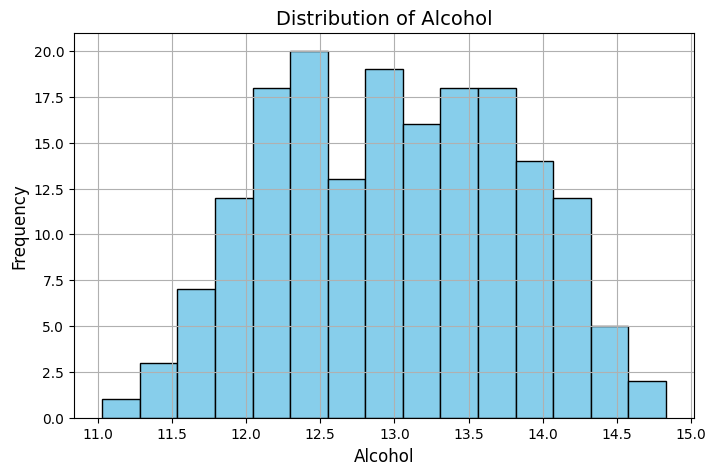

In [5]:
# Plot Histogram
def plot_histogram(data):
    """Plot a histogram for the 'Alcohol' feature."""
    plt.figure(figsize=(8, 5))
    plt.hist(data['Alcohol'], bins=15, color='skyblue', edgecolor='black')
    plt.title('Distribution of Alcohol', fontsize=14)
    plt.xlabel('Alcohol', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)
    plt.show()

plot_histogram(data)

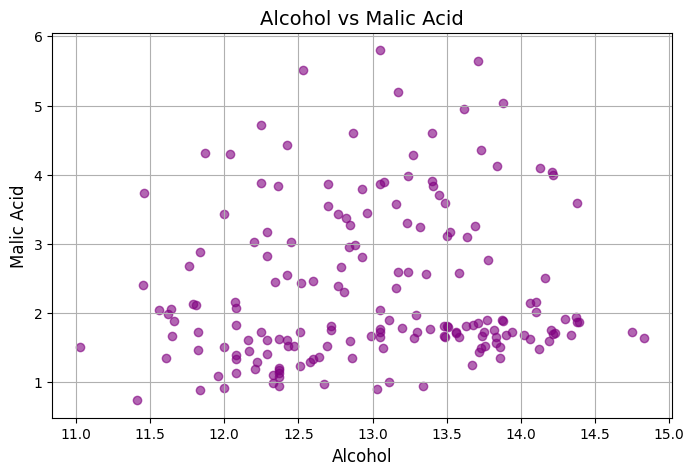

In [6]:
# Plot Scatter
def plot_scatter(data):
    """Create a scatter plot between 'Alcohol' and 'Malic_Acid'."""
    plt.figure(figsize=(8, 5))
    plt.scatter(data['Alcohol'], data['Malic_Acid'], color='purple', alpha=0.6)
    plt.title('Alcohol vs Malic Acid', fontsize=14)
    plt.xlabel('Alcohol', fontsize=12)
    plt.ylabel('Malic Acid', fontsize=12)
    plt.grid(True)
    plt.show()

plot_scatter(data)

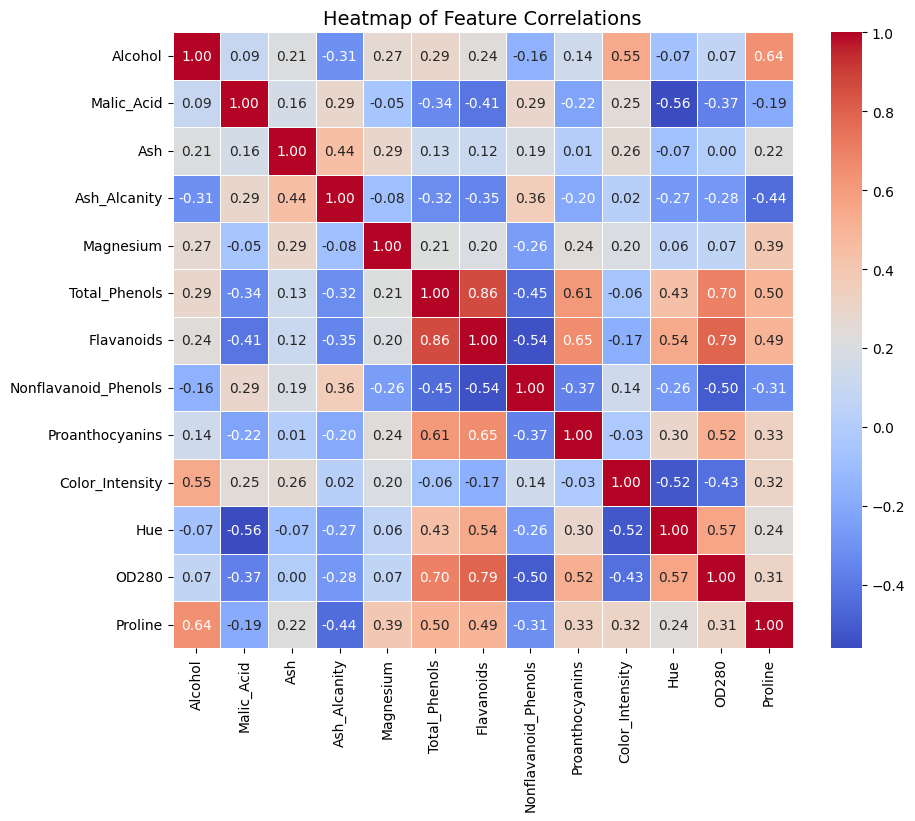

In [7]:
# Plot Heatmap
def plot_heatmap(data):
    """Generate a heatmap of correlations between numerical features."""
    plt.figure(figsize=(10, 8))
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Heatmap of Feature Correlations', fontsize=14)
    plt.show()

plot_heatmap(data)

In [8]:
# Scale Data
def scale_data(data):
    """
    Scale the dataset using StandardScaler.
    Returns the scaled data.
    """
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    return data_scaled

data_scaled = scale_data(data)

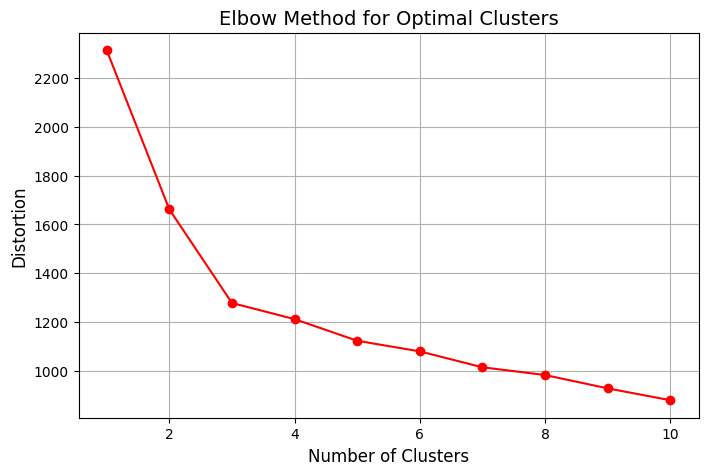

In [9]:
# Elbow Plot for Clustering
def plot_elbow(data_scaled, max_clusters=10):
    """Generate an elbow plot to find the optimal number of clusters."""
    distortions = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data_scaled)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_clusters + 1), distortions, marker='o', color='red')
    plt.title('Elbow Method for Optimal Clusters', fontsize=14)
    plt.xlabel('Number of Clusters', fontsize=12)
    plt.ylabel('Distortion', fontsize=12)
    plt.grid(True)
    plt.show()

plot_elbow(data_scaled, max_clusters=10)

Silhouette Score (K-Means): 0.56
WCSS (K-Means): 260.02


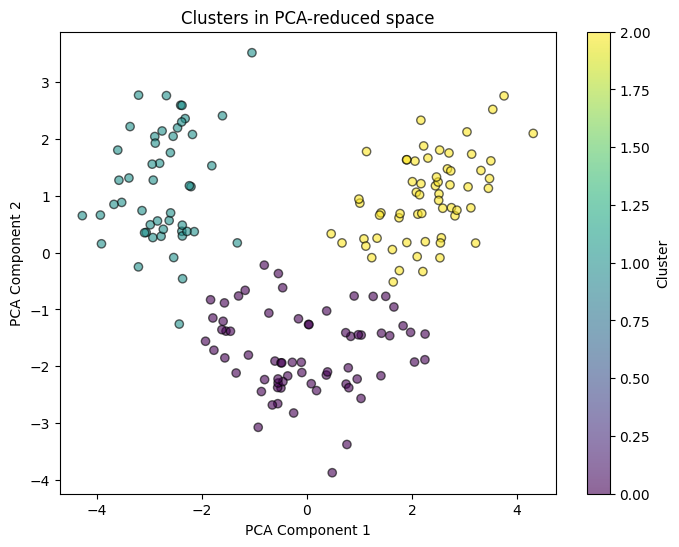

In [10]:
# Perform Clustering
# Function to perform PCA and clustering
def perform_clustering(data, n_clusters=3, use_dbscan=False):
    """
    Perform K-Means or DBSCAN clustering with PCA:
    - Reduce dimensions using PCA
    - Fit the model (K-Means or DBSCAN)
    - Assign cluster labels
    - Evaluate using silhouette score
    """
    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    # Reduce dimensionality to 2 components using PCA
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data_scaled)

    if use_dbscan:
        # DBSCAN Clustering (Density-based)
        dbscan = DBSCAN(eps=0.5, min_samples=5)
        labels = dbscan.fit_predict(data_pca)
        silhouette = silhouette_score(data_pca, labels) if len(set(labels)) > 1 else -1
        print(f'DBSCAN Silhouette Score: {silhouette:.2f}')
    else:
        # K-Means Clustering
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(data_pca)
        silhouette = silhouette_score(data_pca, labels)
        wcss = kmeans.inertia_  # Within-cluster sum of squares
        print(f'Silhouette Score (K-Means): {silhouette:.2f}')
        print(f'WCSS (K-Means): {wcss:.2f}')

    # Visualize clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolors='k')
    plt.title('Clusters in PCA-reduced space')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster')
    plt.show()

    return labels, silhouette

# Perform clustering with the chosen number of clusters
n_clusters = 3
labels, silhouette = perform_clustering(data, n_clusters=n_clusters)

# Assign cluster labels back to the original data
data['Cluster'] = labels

Mean Squared Error (MSE): 0.99
Root Mean Squared Error (RMSE): 0.99
Mean Absolute Error (MAE): 0.89


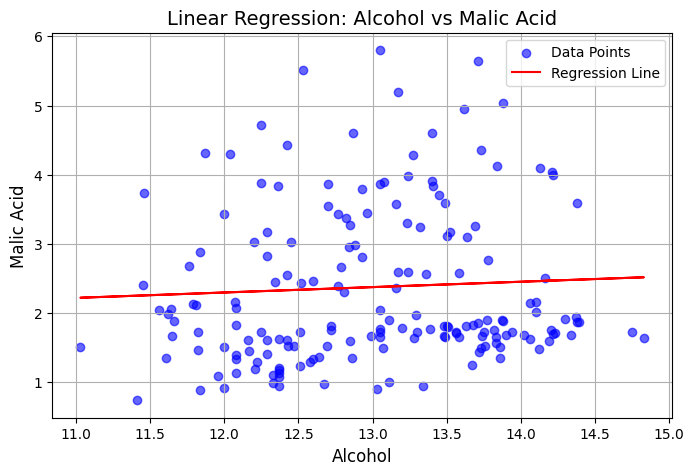

In [11]:
# Line Fitting
# Linear Regression
def perform_fitting(data):
    """
    Perform linear regression between 'Alcohol' and 'Malic_Acid':
    - Split the data
    - Train the model
    - Evaluate MSE, RMSE, and MAE
    - Plot regression line
    """
    X = data[['Alcohol']]
    y = data['Malic_Acid']

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Training the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_test - y_pred))

    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')

    # Plotting regression line
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, color='blue', alpha=0.6, label='Data Points')
    plt.plot(X, model.predict(X), color='red', label='Regression Line')
    plt.title('Linear Regression: Alcohol vs Malic Acid', fontsize=14)
    plt.xlabel('Alcohol', fontsize=12)
    plt.ylabel('Malic Acid', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

    return model

regression_model = perform_fitting(data)
